# maxsmi
## Analysis of results

This notebook serves to analyse the results of the simulations ran on the Curta cluster from the Freie Universität Berlin.

### Early stopping

Simulations can be run using the following command:
```
(maxsmi) $ python maxsmi/full_workflow_earlystopping.py --task lipophilicity --string-encoding smiles --aug-strategy-train augmentation_without_duplication --aug-strategy-test augmentation_without_duplication --aug-nb-train 5 --aug-nb-test 5 --ml-model CONV1D --eval-strategy True
```


### Goal

The aim of this notebook is to compare the results for a subset of models that were trained with and without early stopping.

Models that were trained are:

- ESOL: (CONV2D, Augmentation with duplication, 4),
- FreeSolv: (RNN, Augmentation with reduced duplication, 3),
- Lipophilicity: (CONV1D, Augmentation without duplication, 5).

In [1]:
import os
from pathlib import Path
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Path to this notebook
HERE = Path(_dh[-1])

path_to_output = HERE.parents[0]

Un/comment the cell(s) below for a given task of interest.

In [2]:
TASK = "FreeSolv"
ML_MODEL = "RNN"
AUGMENTATION_STRATEGY = "augmentation_with_reduced_duplication"
AUGMENTATION_NUMBER = 3
STRING_ENCODING = "smiles"

In [3]:
def test_RMSE(path,
              task,
              augmentation_strategy_train,
              train_augmentation,
              augmentation_strategy_test,
              test_augmentation,
              ml_model,
              string_encoding="smiles",
              trial=1):
    """
    Loads the result data from simulations with and without early stopping.

    Parameters
    ----------
    path : str
        The path to output folder.
    task : str
        The data with associated task, e.g. "ESOL", "FreeSolv"
    augmentation_strategy_train : str
        The augmentation strategy used on the train set.
    train_augmentation : int
        The number of augmentation on the train set.
    augmentation_strategy_test : str
        The augmentation strategy used on the test set.
    test_augmentation : int
        The number of augmentation on the test set.
    ml_model : str
        The machine learning model, e.g. "CONV1D".
    string_encoding : str
        The molecular encoding, default is "smiles".
    trial : int, default 1
        Iteration of the training process.

    Returns
    -------
    tuple: (float, float)
        The test RMSE without and with early stopping.
    """

    try:
        with open(
                f"{path}/output_early_stopping/output_{trial}/"
                f"{task}_{string_encoding}_{augmentation_strategy_train}_"
                f"{train_augmentation}_{augmentation_strategy_test}_"
                f"{test_augmentation}_{ml_model}_earlystopping/"
                f"results_metrics.pkl",
                "rb",
        ) as f:
            data = pickle.load(f)
            test_rmse_earlystopping = data.test[0][1]
    except FileNotFoundError:
        test_rmse_earlystopping = np.nan

    try:
        with open(
                f"{path}/output_early_stopping/output_{trial}/"
                f"{task}_{string_encoding}_{augmentation_strategy_train}_"
                f"{train_augmentation}_{augmentation_strategy_test}_"
                f"{test_augmentation}_{ml_model}/"
                f"results_metrics.pkl",
                "rb",
        ) as f:
            data = pickle.load(f)
            test_rmse_no_earlystopping = data.test[0][1]
    except FileNotFoundError:
        test_rmse_no_earlystopping = np.nan

    return (test_rmse_no_earlystopping, test_rmse_earlystopping)

In [4]:
list_train_iterations = [test_RMSE(path_to_output,
                         TASK,
                         AUGMENTATION_STRATEGY,
                         AUGMENTATION_NUMBER,
                         AUGMENTATION_STRATEGY,
                         AUGMENTATION_NUMBER,
                         ML_MODEL, STRING_ENCODING,
                         trial=i) for i in range(1, 11)]
list_train_iterations

[(1.8392073512321943, 1.8566417814555312),
 (1.8037040487036347, 1.8615302358806867),
 (2.076443573580853, 1.8329236462556449),
 (2.433022338323056, 1.8640063255457333),
 (1.7808560189909532, 1.9245162284889306),
 (2.2297661252873935, 1.8860288029500352),
 (2.028570919832693, 1.888703396595393),
 (2.354452138091834, 1.8660613626181033),
 (1.8103277033573009, 1.834616733271631),
 (1.7754037820576978, 1.9432375078702857)]

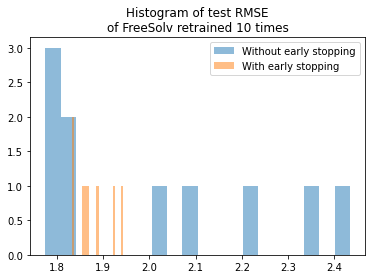

In [5]:
plt.hist([without_early[0] for without_early in list_train_iterations], alpha=0.5, bins=20)
plt.hist([with_early[1] for with_early in list_train_iterations], alpha=0.5, bins=30)
plt.legend(["Without early stopping", "With early stopping", "mean"])
plt.title(f"Histogram of test RMSE\nof {TASK} retrained 10 times")
plt.show()

In [6]:
mean_with_early = np.mean([with_early[1] for with_early in list_train_iterations])
print(f"Mean with early stopping: {mean_with_early:.3f}")

std_with_early = np.std([with_early[1] for with_early in list_train_iterations])
print(f"Standard deviation with early stopping: {std_with_early:.3f}")

Mean with early stopping: 1.876
Standard deviation with early stopping: 0.034


In [7]:
mean_without_early = np.mean([without_early[0] for without_early in list_train_iterations])
print(f"Mean without early stopping: {mean_without_early:.3f}")

std_without_early = np.std([without_early[0] for without_early in list_train_iterations])
print(f"Standard deviation without early stopping: {std_without_early:.3f}")

Mean without early stopping: 2.013
Standard deviation without early stopping: 0.239
